# Preliminary Steps 

## Import required libraries 

In [89]:
import numpy as np
import pandas as pd

# for visualising (EDA) 
import seaborn as sb
sb.set(font_scale=2) # set the default Seaborn style for graphics 
sb.set_theme(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt # we only need pyplot
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

##  Import cleaned dataset 

In [90]:
news = pd.read_csv("cleaned_news\cleaned_news\cleaned_news.csv")

In [91]:
# view row and column dimensions of the dataframe 
news.shape

(44898, 26)

In [92]:
# view the dataframe 
news.head()

,title,text,subject,date,label,label_meaning,processed_title,processed_text,title_polarity_score,text_polarity_score,...,title_pos_noun,title_pos_num,title_pos_pron,title_pos_verb,text_pos_adj,text_pos_adv,text_pos_noun,text_pos_num,text_pos_pron,text_pos_verb
0,Pennsylvania Church Demonstrates How To Deal ...,While many churches defend pastors who have ra...,News,"October 13, 2016",0,False,"['church', 'demonstrate', 'deal', 'pastor']","['many', 'church', 'defend', 'pastor', 'rap', ...",0.000,0.137722,...,4,0,0,0,31,11,106,3,0,20
1,Trump to keep Obama rule curbing corporate tax...,(This October 4 story fixes comment by Organi...,politicsNews,"October 4, 2017",1,True,"['trump', 'keep', 'rule', 'curb', 'corporate',...","['story', 'fix', 'comment', 'organization', 'i...",0.000,-0.083772,...,6,0,0,1,37,11,147,2,0,34
2,Trump says he's considering keeping parts of O...,(Reuters) - President-elect Donald Trump told ...,politicsNews,"November 11, 2016",1,True,"['trump', 'say', 'consider', 'keep', 'part']","['trump', 'tell', 'wall', 'street', 'journal',...",0.000,0.142177,...,2,0,0,2,32,7,94,2,0,33
3,CalPERS chief sees volatility until Trump impl...,SAN FRANCISCO (Reuters) - The California Publi...,politicsNews,"November 14, 2016",1,True,"['chief', 'see', 'volatility', 'trump', 'imple...","['san', 'public', 'employee', 'retirement', 's...",0.000,0.085190,...,4,0,0,1,32,7,58,1,0,15
4,House votes to protect 'dark money' political ...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,"June 14, 2016",1,True,"['house', 'vote', 'protect', 'dark', 'money', ...","['house', 'representative', 'vote', 'protect',...",-0.075,-0.002778,...,4,0,0,1,59,8,118,2,0,41


# Exploratory Data Analysis (EDA)

## Visualise fake news to real news ratio 

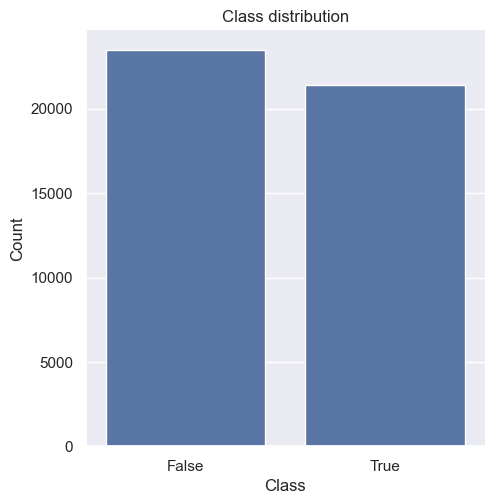

In [93]:
# Class analysis
sb.catplot(x="label_meaning", data=news, kind = "count").set(
    title="Class distribution", 
    xlabel='Class', 
    ylabel='Count')

There is class imbalance

<add justification>

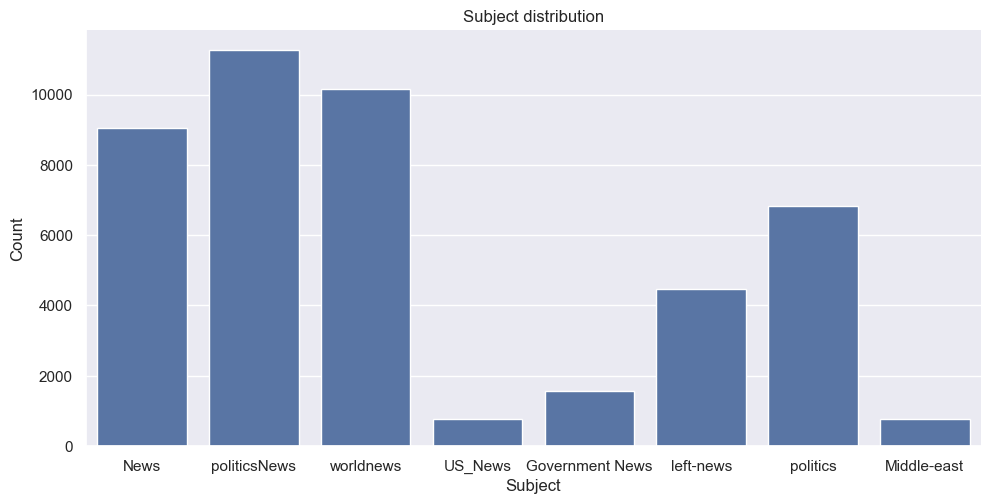

In [94]:
# Subject analysis
sb.catplot(x="subject", data=news, kind = "count", height=5, aspect=2).set(
    title="Subject distribution", 
    xlabel='Subject', 
    ylabel='Count')

![Alt text](ISOT_Stats.png "ISOT Stats")


## Descriptive Statistics Comparison between fake and real news 

### Generating functions for comparison 

In [95]:
# define function to calculate ecdf (empirical cumulative distribution function)
def ecdf(data): 
    length = len(data)
    x = np.sort(data)
    y = np.arange(1, length+1) / length 

    return x, y 

# define function to generate both histogram and ECDF plot side by side 
def generate_hist_ECDF(data, x_label, title): 
    x_1, y_1 = ecdf(data=data[news["label"] == 1])
    x_0, y_0 = ecdf(data=data[news["label"] == 0])
 
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
    fig.suptitle("ECDF and histogram plots for col — {} comparision between true and false".format(title))
 
    _ = ax1.plot(x_1, y_1, marker=".", linestyle="none", label='True')
    _ = ax1.plot(x_0, y_0, marker=".", linestyle="none", label='False')
    ax1.set(xlabel=x_label, ylabel="CDF")
    ax1.legend()
 
    _ = ax2.hist(data[news["label"] == 1],density=True,bins=50, label='True')
    _ = ax2.hist(data[news["label"] == 0],density=True,bins=50, label='False')
    ax2.set(xlabel=x_label, ylabel="Probability")
    ax2.legend()

 
    plt.legend()
    plt.show()
    
# define function to generate both boxplot and violinplot side by side 
def generate_box_violin(data, x_label, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle("Box and Violin plots for col — {} comparison between true and false".format(title))
    
    # Boxplot
    sb.boxplot(x=data[news["label"] == 1], ax=ax1)
    sb.boxplot(x=data[news["label"] == 0], ax=ax1)
    ax1.set(xlabel=x_label, ylabel="Value")
    ax1.set_xticklabels(['True', 'False'])
    ax1.legend()
    
    # Violinplot
    sb.violinplot(x=data[news["label"] == 1], ax=ax2)
    sb.violinplot(x=data[news["label"] == 0], ax=ax2)
    ax2.set(xlabel=x_label, ylabel="Density")
    ax2.set_xticklabels(['True', 'False'])
    ax2.legend()

    plt.show()

### 1. Word and Character Length Comparison 

a. Exploring differences in character length of news text between true and fake news 

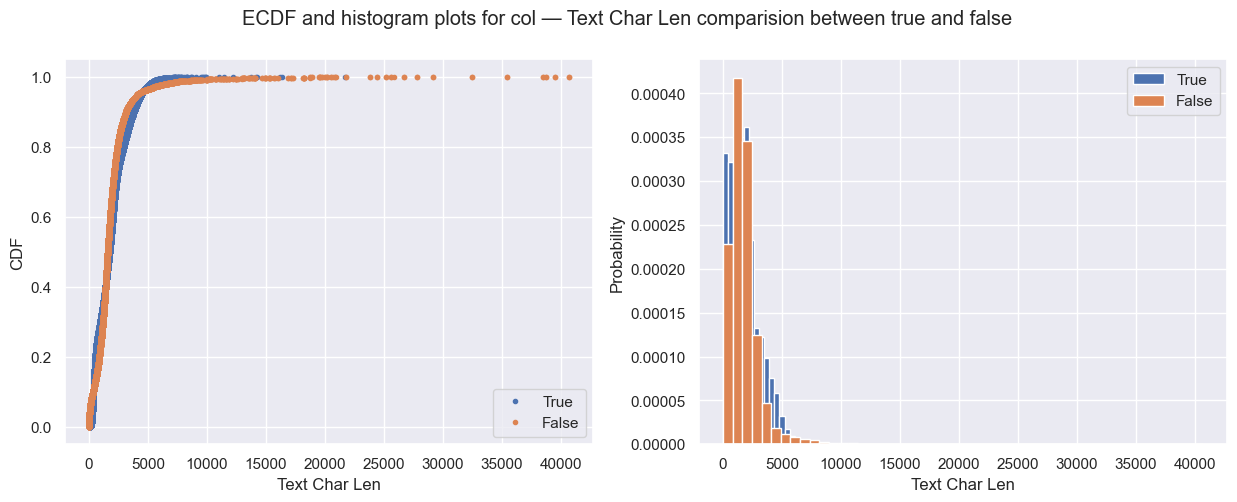

In [96]:
generate_hist_ECDF(data=news["text_char_len"],x_label="Text Char Len",title="Text Char Len")

C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


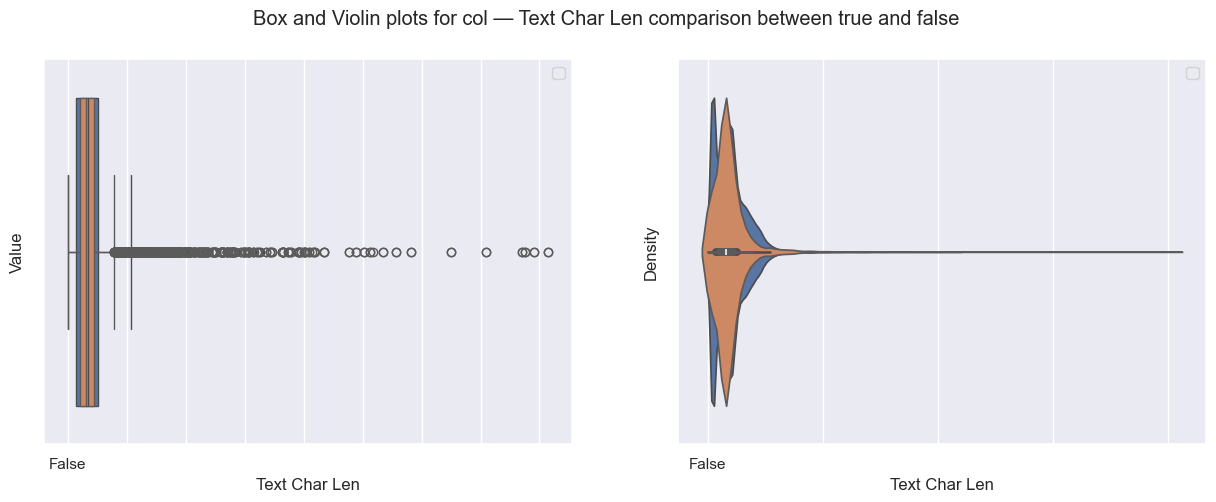

In [97]:
generate_box_violin(data=news["text_char_len"],x_label="Text Char Len",title="Text Char Len")

b. Exploring differences in the character length of news titles between true and fake news 

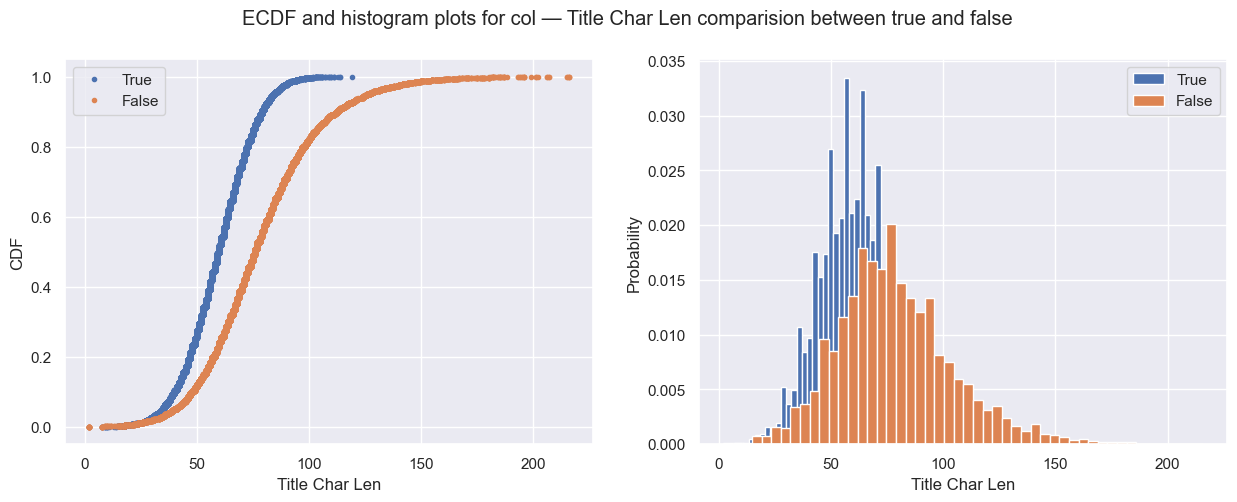

In [98]:
generate_hist_ECDF(data=news["title_char_len"],x_label="Title Char Len",title="Title Char Len")

C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


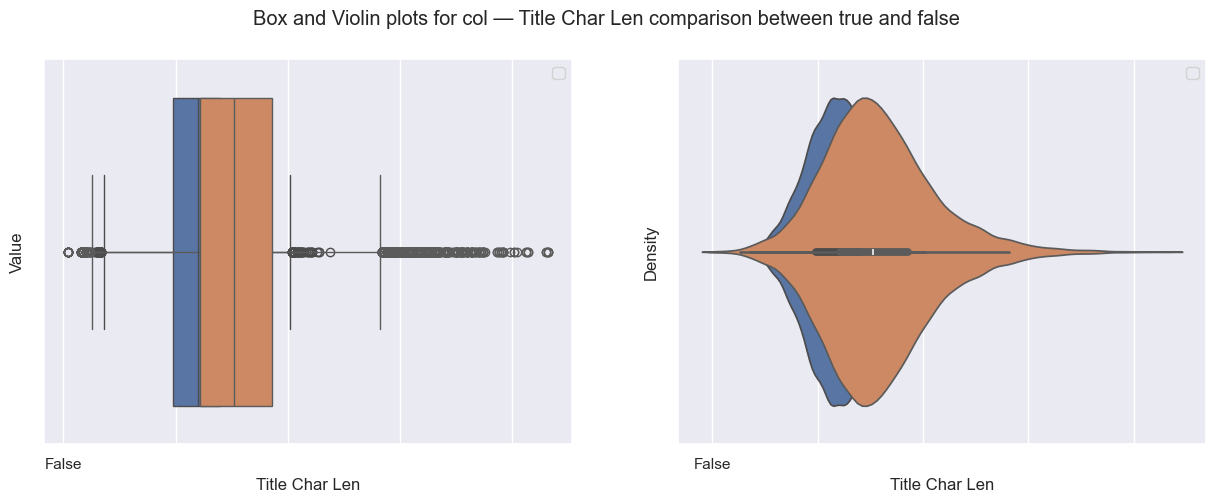

In [99]:
generate_box_violin(data=news["title_char_len"],x_label="Title Char Len",title="Title Char Len")

c. Exploring differences in the word count of news text between true and fake news 

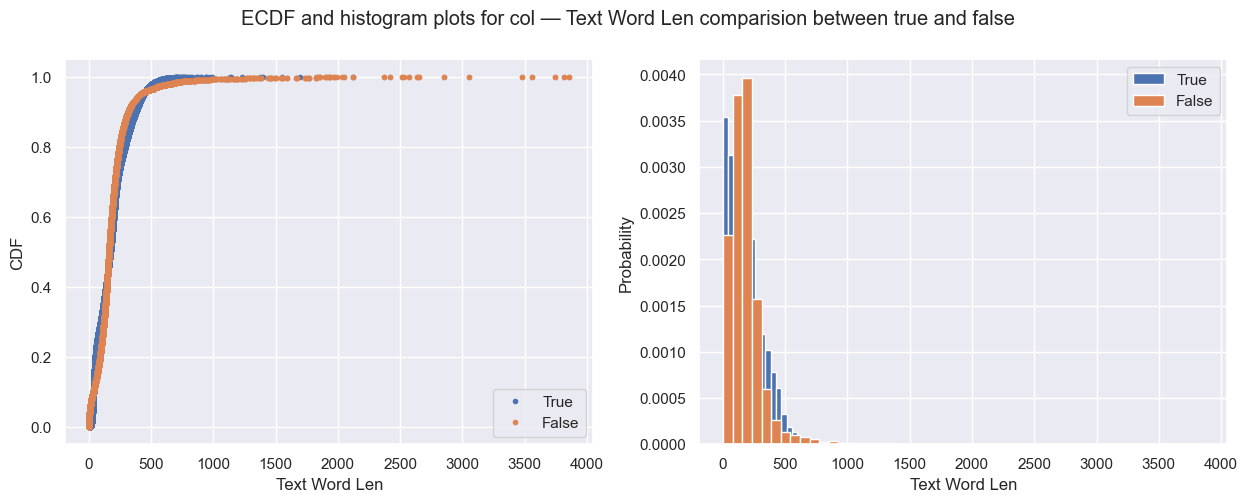

In [100]:
generate_hist_ECDF(data=news["text_word_len"],x_label="Text Word Len",title="Text Word Len")

C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


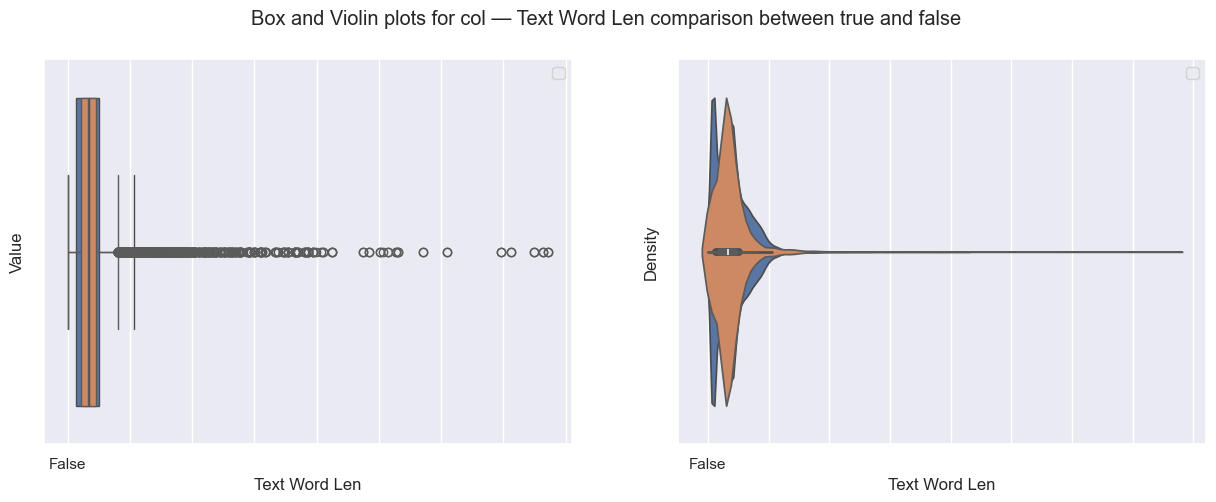

In [101]:
generate_box_violin(data=news["text_word_len"],x_label="Text Word Len",title="Text Word Len")

d. Exploring differences in the word count of news titles between true and fake news 

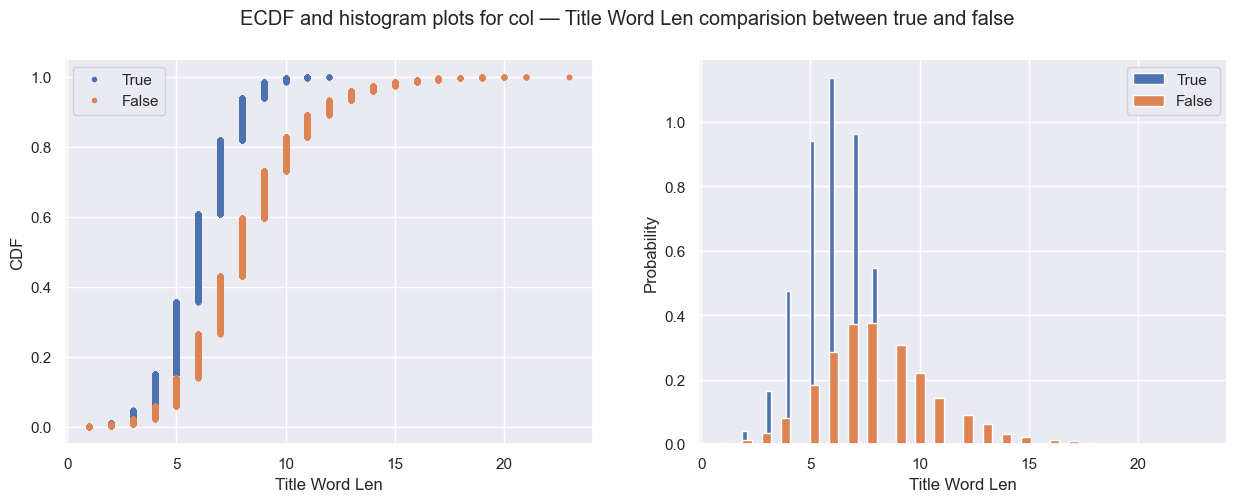

In [102]:
generate_hist_ECDF(data=news["title_word_len"],x_label="Title Word Len",title="Title Word Len")

C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


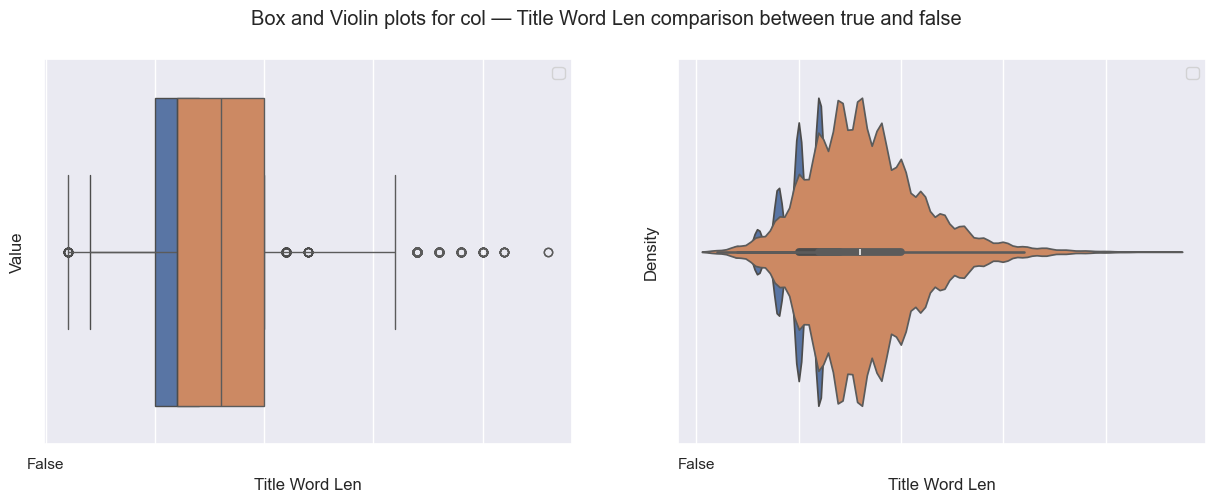

In [103]:
generate_box_violin(data=news["title_word_len"],x_label="Title Word Len",title="Title Word Len")

There is not much difference in the character and word lengths, except for the word length of titles. Generally, fake news have a longer word length than true news. 

### 2. Sentiment Polarity Comparison

a. Exploring differences in the sentiment polarity of news texts between true and fake news 

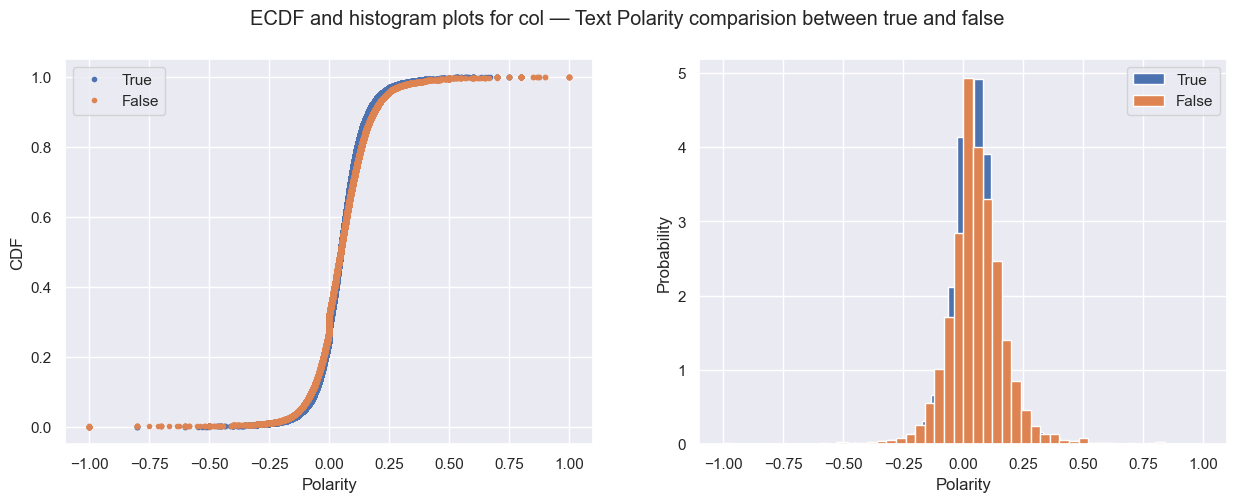

In [104]:
generate_hist_ECDF(data=news["text_polarity_score"],x_label="Polarity",title="Text Polarity")

C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


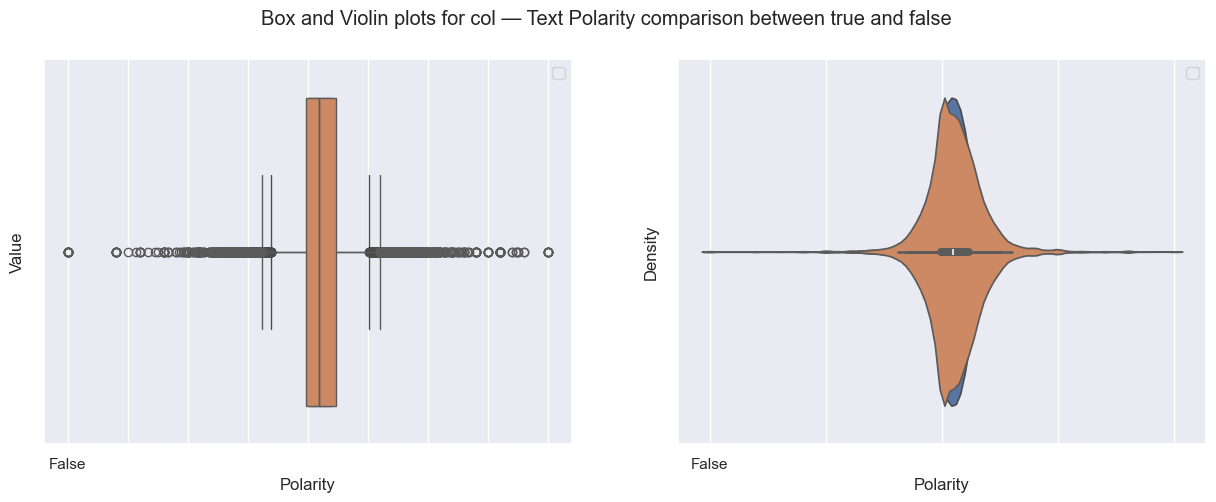

In [105]:
generate_box_violin(data=news["text_polarity_score"],x_label="Polarity",title="Text Polarity")

Exploring differences in the sentiment polarity of news titles between true and fake news

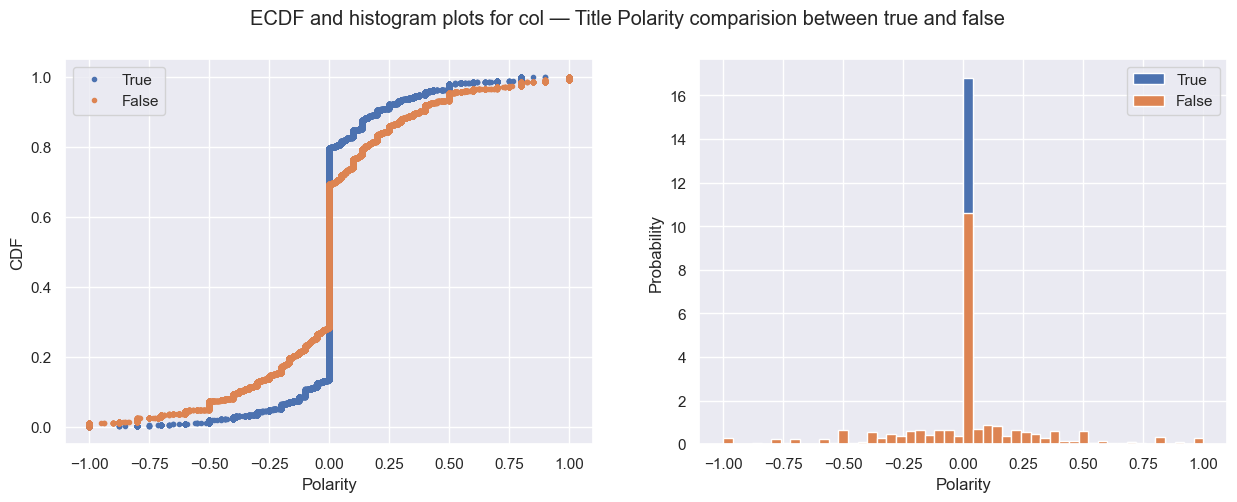

In [106]:
generate_hist_ECDF(data=news["title_polarity_score"],x_label="Polarity",title="Title Polarity")

C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\2389620210.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['True', 'False'])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


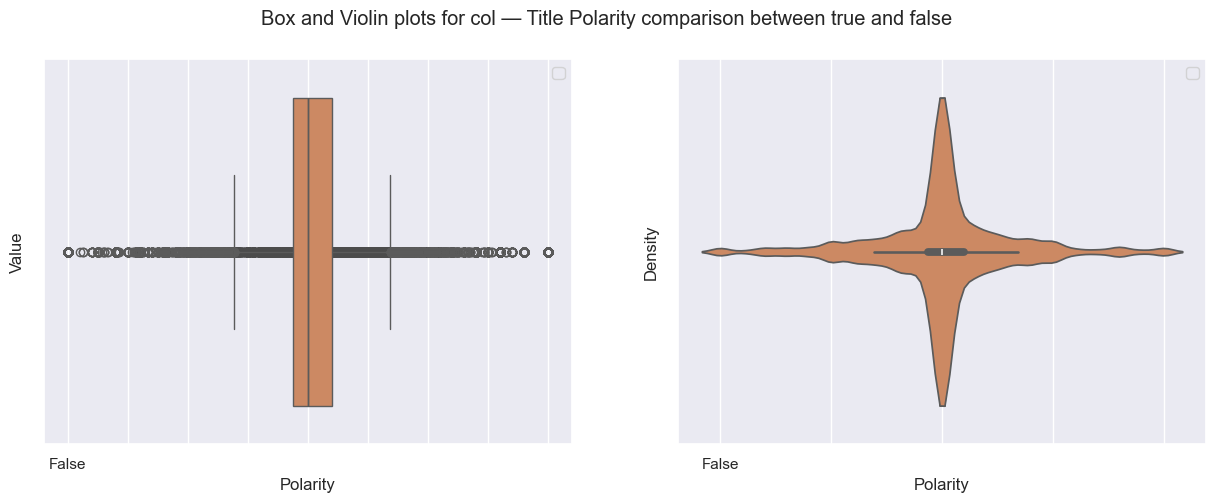

In [107]:
generate_box_violin(data=news["title_polarity_score"],x_label="Polarity",title="Title Polarity")

### 3. Parts of Speech (POS) Comparison 

a. Exploring differences in parts of speech (POS) of news texts between true and fake news 

[Text(0.5, 1.0, 'Types of title POS across classes'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'POS type')]

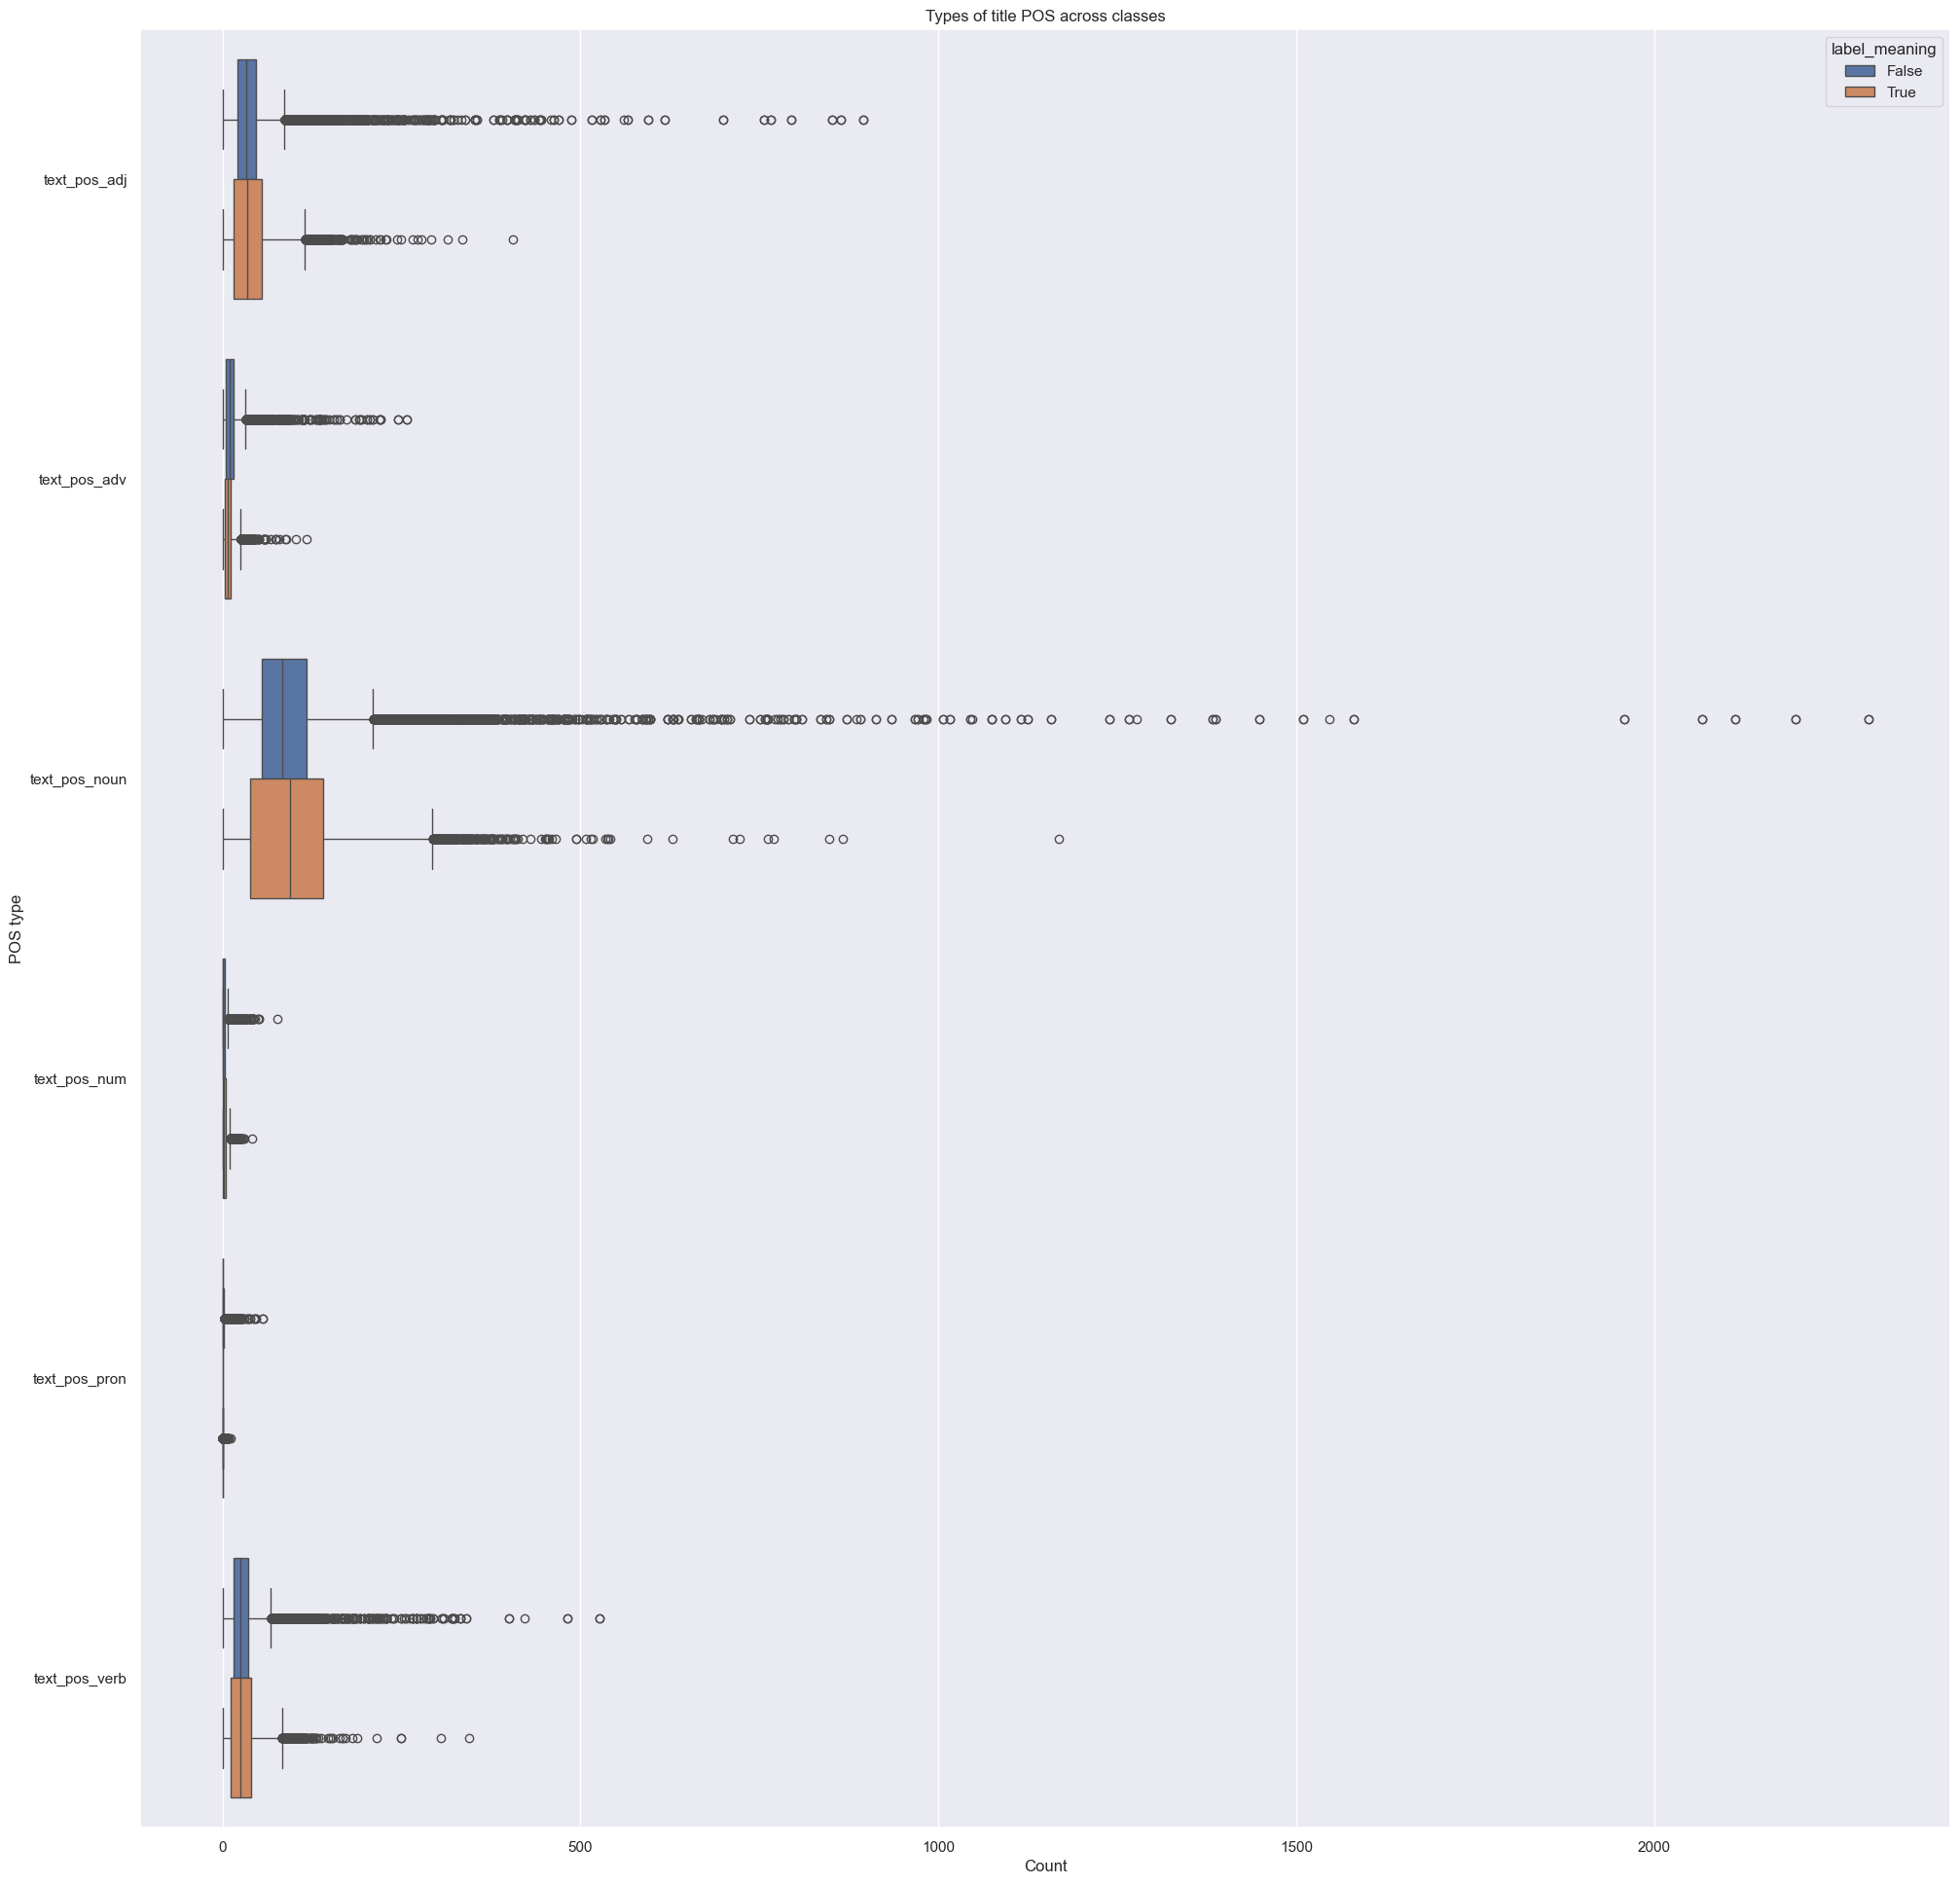

In [108]:
# Isolating required data
f = plt.figure(figsize=(24,24))
pos_df = pd.concat([news["text_pos_adj"], 
                    news["text_pos_adv"], 
                    news["text_pos_noun"], 
                    news["text_pos_num"], 
                    news["text_pos_pron"], 
                    news["text_pos_verb"],
                    news["label_meaning"]], axis = 1)

# Un-pivot dataframe column as rows so in order to plot both at the same graph, same axis
pos_df = pd.melt(pos_df, id_vars=['label_meaning'], var_name=['pos']) 

# Plot boxplot
sb.boxplot(x='value', y = "pos", hue = "label_meaning", data = pos_df, orient = "h", showfliers = True).set(title="Types of title POS across classes", 
                                                                                                                    xlabel='Count',
                                                                                                                    ylabel='POS type')

b. Exploring differences in parts of speech (POS) of news titles between true and fake news 

[Text(0.5, 1.0, 'Types of title POS across classes'),
 Text(0.5, 0, 'Count'),
 Text(0, 0.5, 'POS type')]

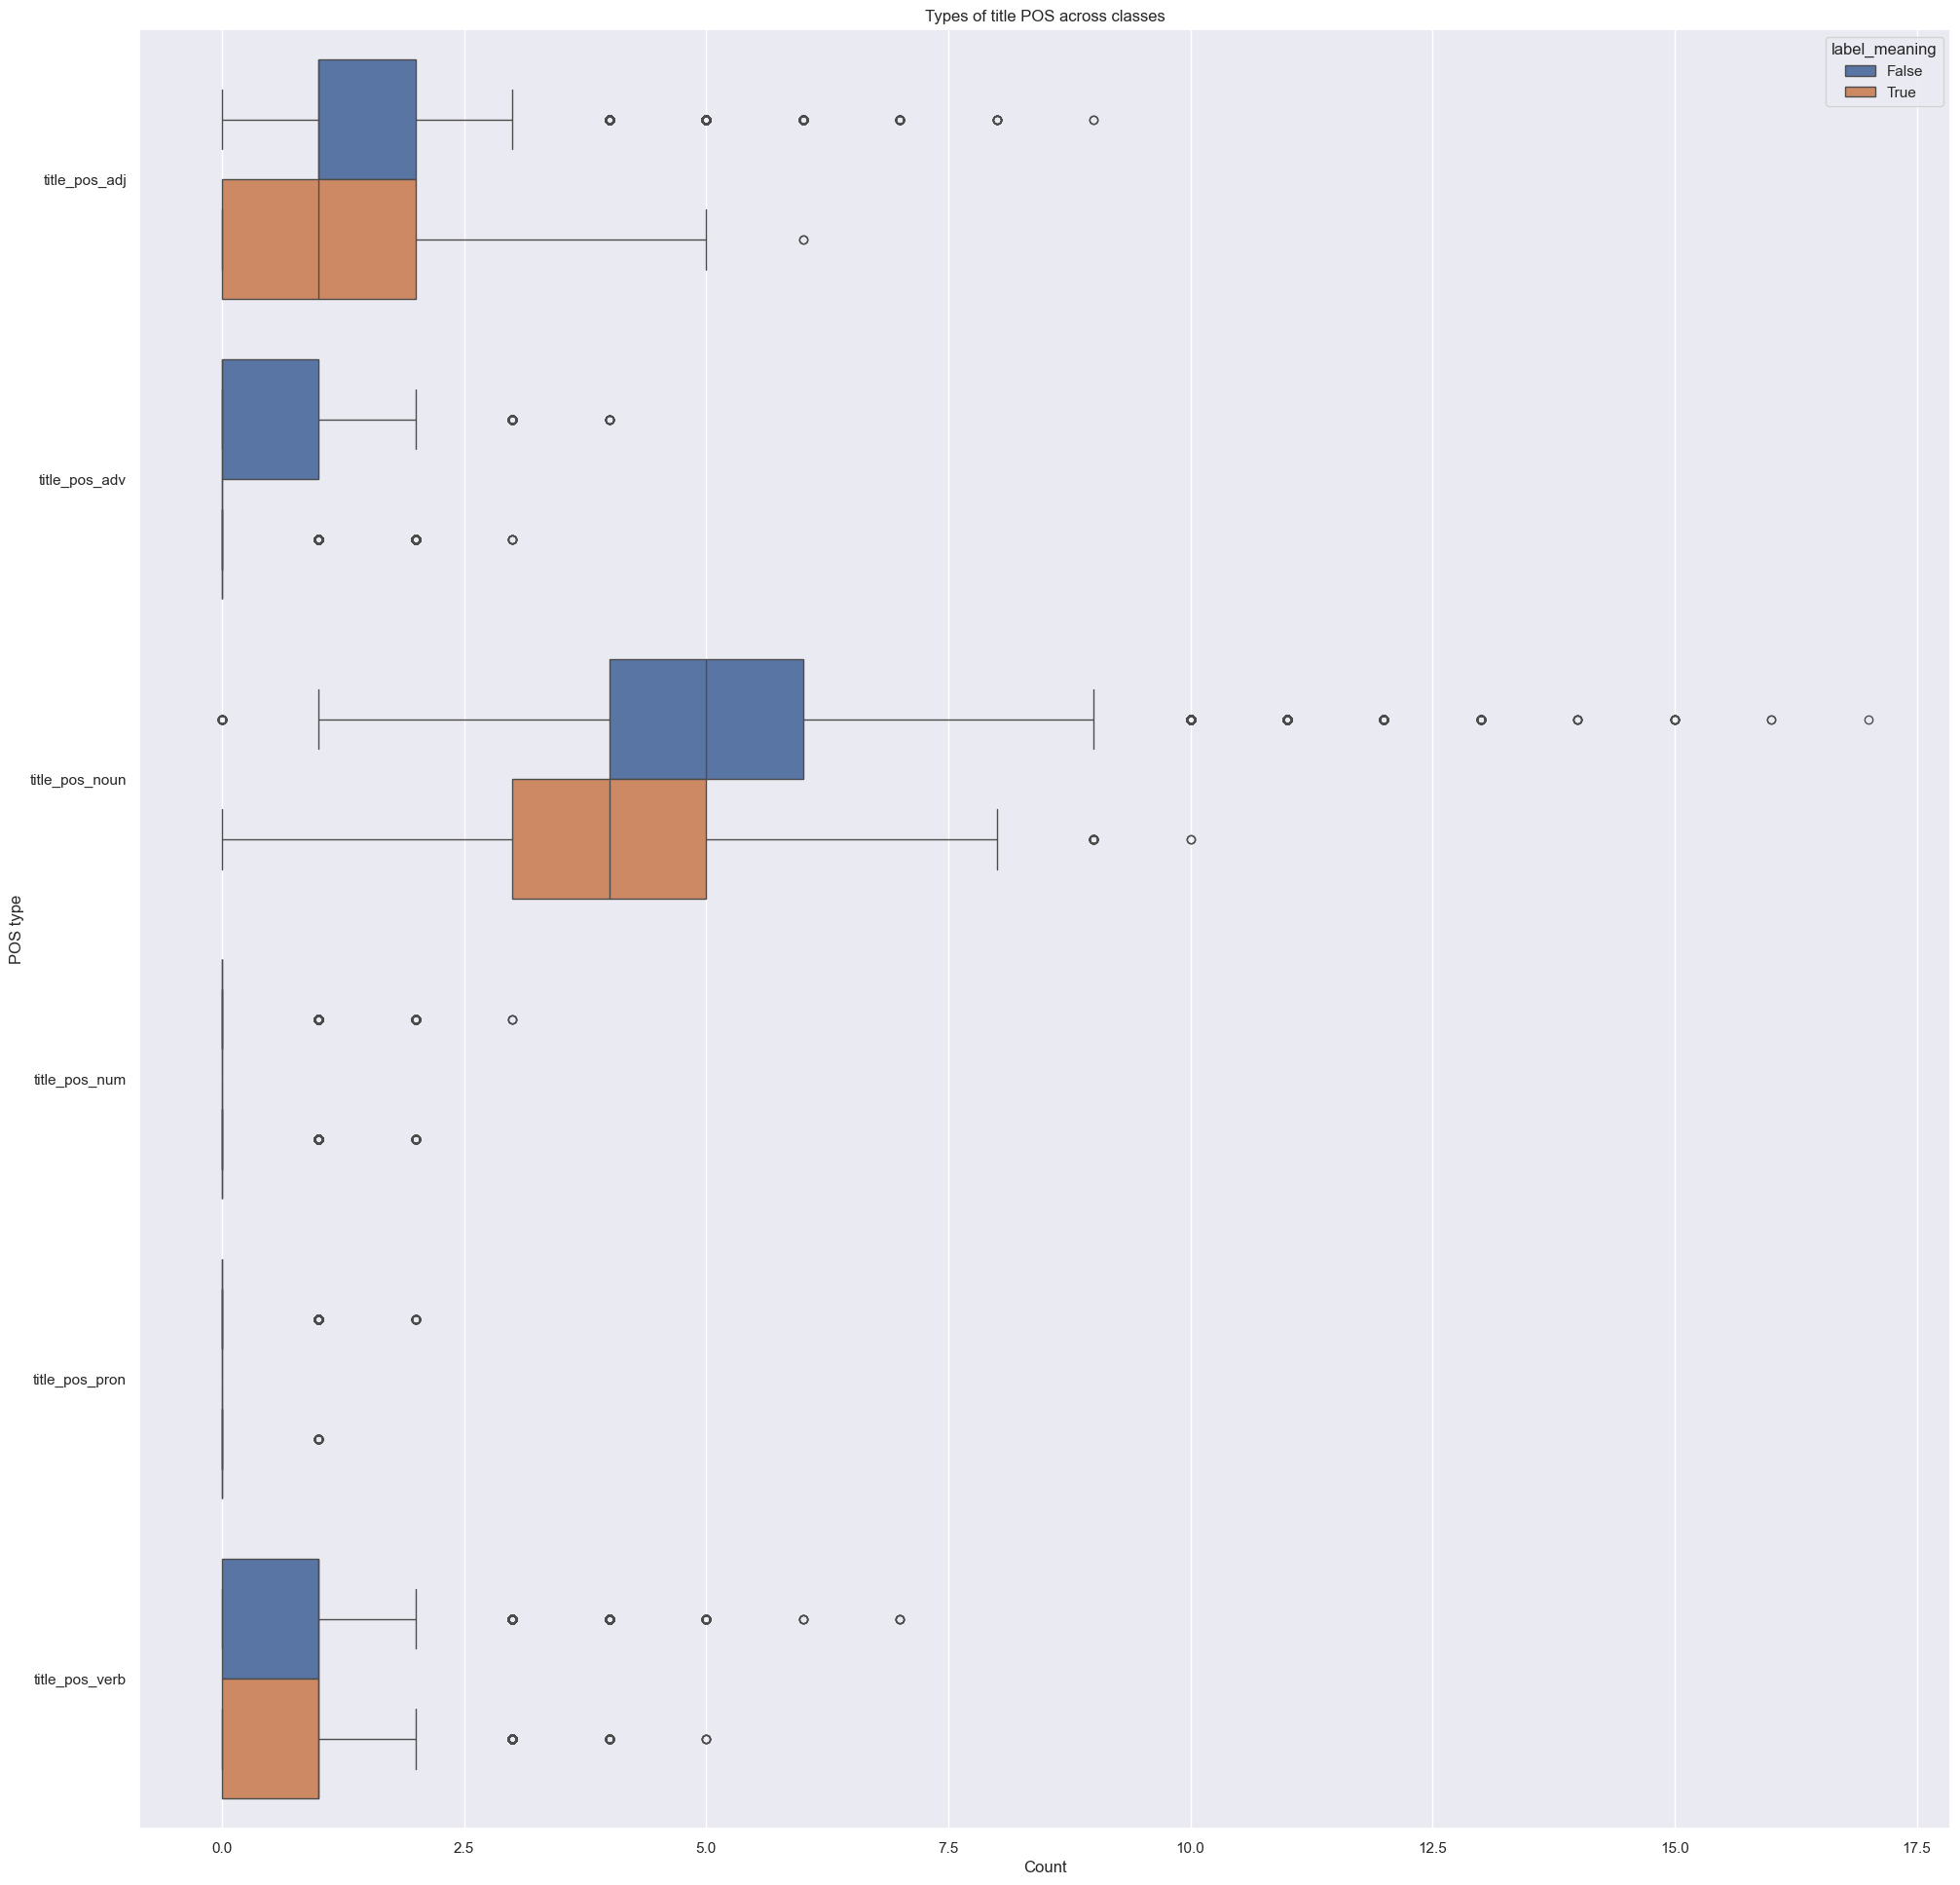

In [109]:
# Isolating required data
f = plt.figure(figsize=(24,24))
pos_df = pd.concat([news["title_pos_adj"], 
                    news["title_pos_adv"], 
                    news["title_pos_noun"], 
                    news["title_pos_num"], 
                    news["title_pos_pron"], 
                    news["title_pos_verb"],
                    news["label_meaning"]], axis = 1)

# Un-pivot dataframe column as rows so in order to plot both at the same graph, same axis
pos_df = pd.melt(pos_df, id_vars=['label_meaning'], var_name=['pos']) 

# Plot boxplot
sb.boxplot(x='value', y = "pos", hue = "label_meaning", data = pos_df, orient = "h", showfliers = True).set(title="Types of title POS across classes", 
                                                                                                                    xlabel='Count',
                                                                                                                    ylabel='POS type')

## Corpus Analysis 

### 1. Frequent Terms Comparison 

a. Comparing top 10 words in news text 

C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\791625033.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_fake["text"], fontsize=10, rotation=45)
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\791625033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=10)
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\791625033.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_true["text"], fontsize=10, rotation=45)
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\791625033.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yti

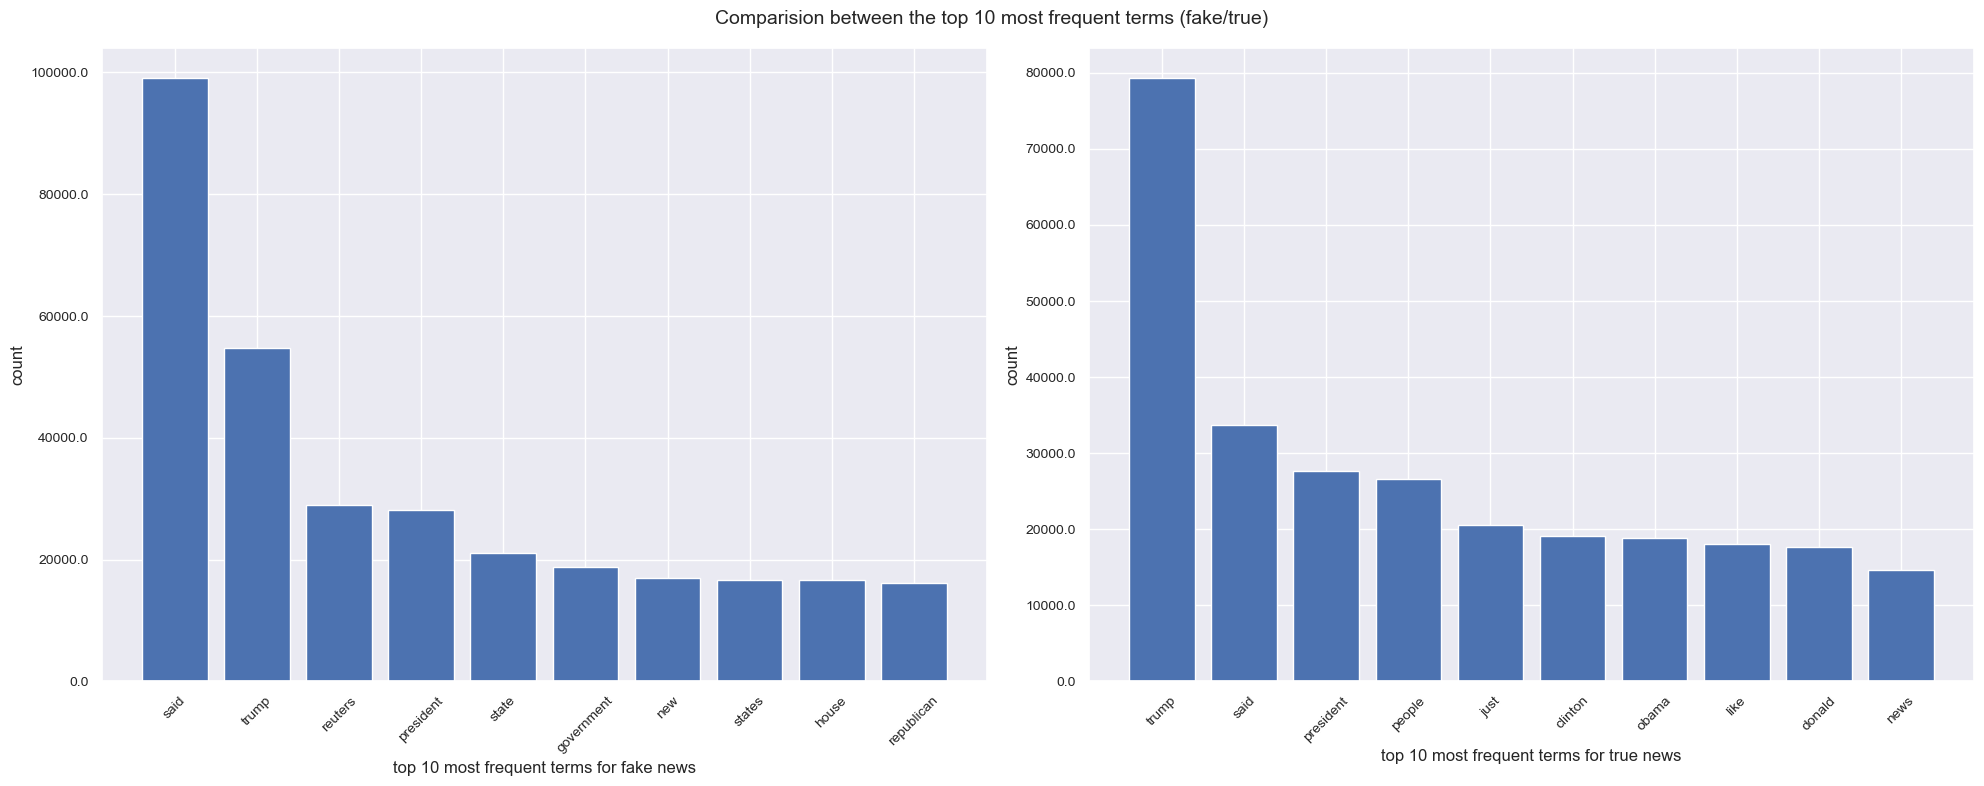

In [110]:
# define function to generate top 10 words 

def get_top_n_words(corpus, n=None):
 
    corpus_fake = corpus[news["label"] == 1].astype(str)
    corpus_true = corpus[news["label"] == 0].astype(str)
 
    vec = CountVectorizer(stop_words = "english").fit(corpus_fake)
    bag_of_words = vec.transform(corpus_fake)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq_fake = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq_fake =sorted(words_freq_fake, key = lambda x: x[1], reverse=True)
 
    vec = CountVectorizer(stop_words = "english").fit(corpus_true)
    bag_of_words = vec.transform(corpus_true)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq_true = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq_true =sorted(words_freq_true, key = lambda x: x[1], reverse=True)
 
    df_fake = pd.DataFrame(words_freq_fake[:n],columns = ["text", "count"])
    df_true = pd.DataFrame(words_freq_true[:n],columns = ["text", "count"])
 
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
    
    ax1.bar(df_fake["text"], df_fake["count"])
    ax1.set_xticklabels(df_fake["text"], fontsize=10, rotation=45)
    ax1.set_yticklabels(ax1.get_yticks(), fontsize=10)
    ax1.set(xlabel="top 10 most frequent terms for fake news", ylabel="count")
    
    ax2.bar(df_true["text"], df_true["count"])
    ax2.set_xticklabels(df_true["text"], fontsize=10, rotation=45)
    ax2.set_yticklabels(ax2.get_yticks(), fontsize=10)
    ax2.set(xlabel="top 10 most frequent terms for true news", ylabel="count")
    
    plt.suptitle("Comparision between the top 10 most frequent terms (fake/true)", fontsize=14)

    plt.tight_layout()
    
    plt.show()

get_top_n_words(corpus=news["text"], n=10)


b. Comparing top 10 words in news titles

C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\791625033.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_fake["text"], fontsize=10, rotation=45)
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\791625033.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(ax1.get_yticks(), fontsize=10)
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\791625033.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_true["text"], fontsize=10, rotation=45)
C:\Users\zhenr\AppData\Local\Temp\ipykernel_143892\791625033.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yti

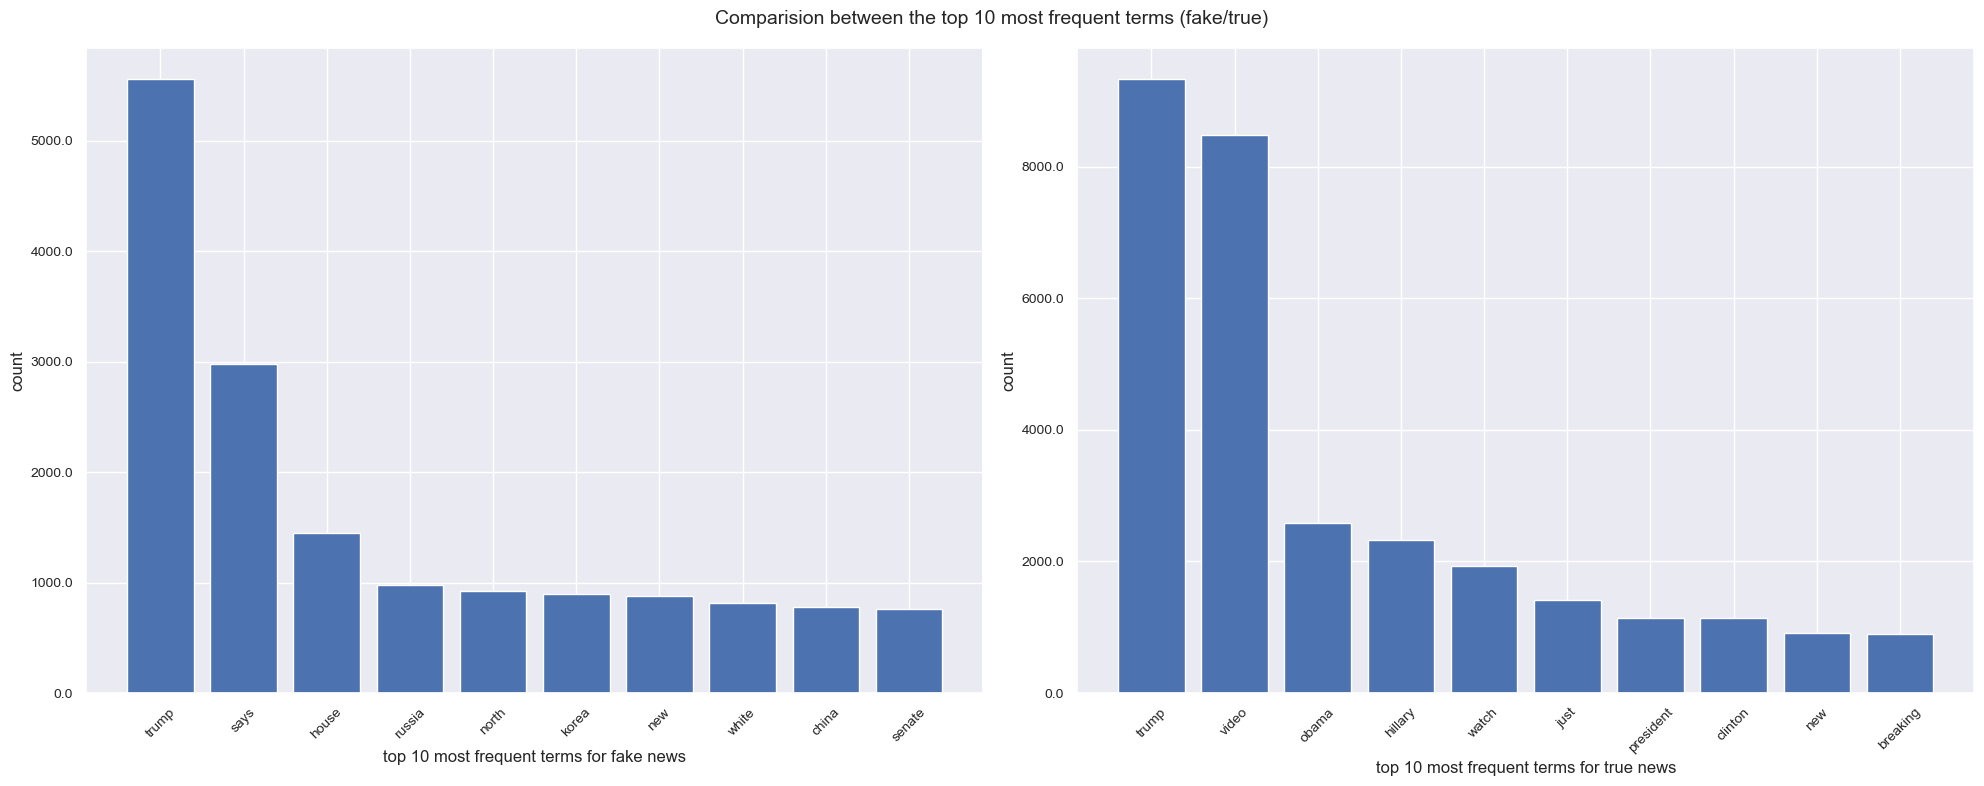

In [111]:
get_top_n_words(corpus=news["title"], n=10)

Based on the comparison between the top 10 frequent words in titles and news text, we can infer that both fake and true news is dominated by news relating to politics¶


More specifically, the subject being heavily related to American politics is shared between true and fake news. Due to the datasets being collected from Reuters.com (News website) and unreliable websites that were flagged by Politifact (a fact-checking organization in the USA) and Wikipedia. Hence, the majority of articles focus on political and World news topics.

 This may be an issue when creating the models later on as the models may not be able to generalize well during training. Additional, biases might arise in our trained models, where the model selection may favor political features or assumptions over others topics. 

## Correlation Analysis 

### 1. General Correlation (Numerical Variables) 

<Figure size 2000x800 with 0 Axes>

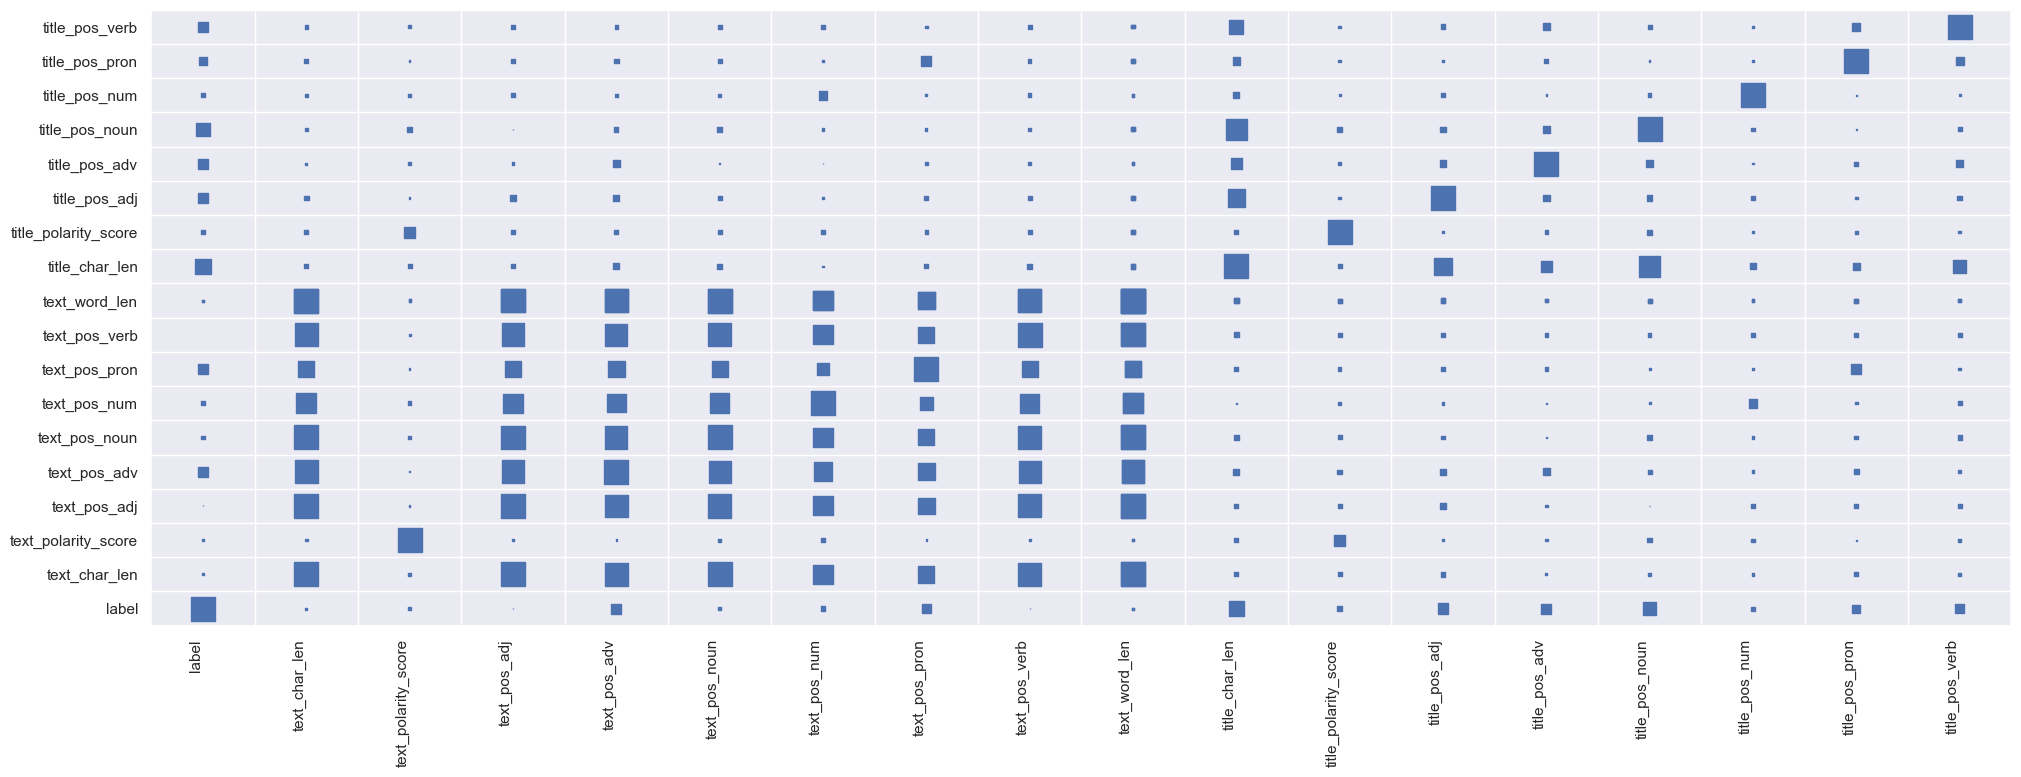

In [112]:
def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize=(24, 8))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 300
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size*size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=90, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

    
f = plt.figure(figsize=(20, 8))
columns = ['label', 'text_char_len',
           'title_char_len',
           'text_word_len',
           'text_word_len',
           'title_polarity_score',
          'text_polarity_score',
          'title_pos_adj',
          'title_pos_adv',
          'title_pos_noun',
          'title_pos_num',
          'title_pos_pron',
          'title_pos_verb',
          'text_pos_adj',
          'text_pos_adv',
          'text_pos_noun',
           'text_pos_num',
           'text_pos_pron',
           'text_pos_verb'
          ] 
corr = news[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']

heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

### 2. POS correlations  

[Text(0.5, 1.0, 'POS to label correlation heatmap')]

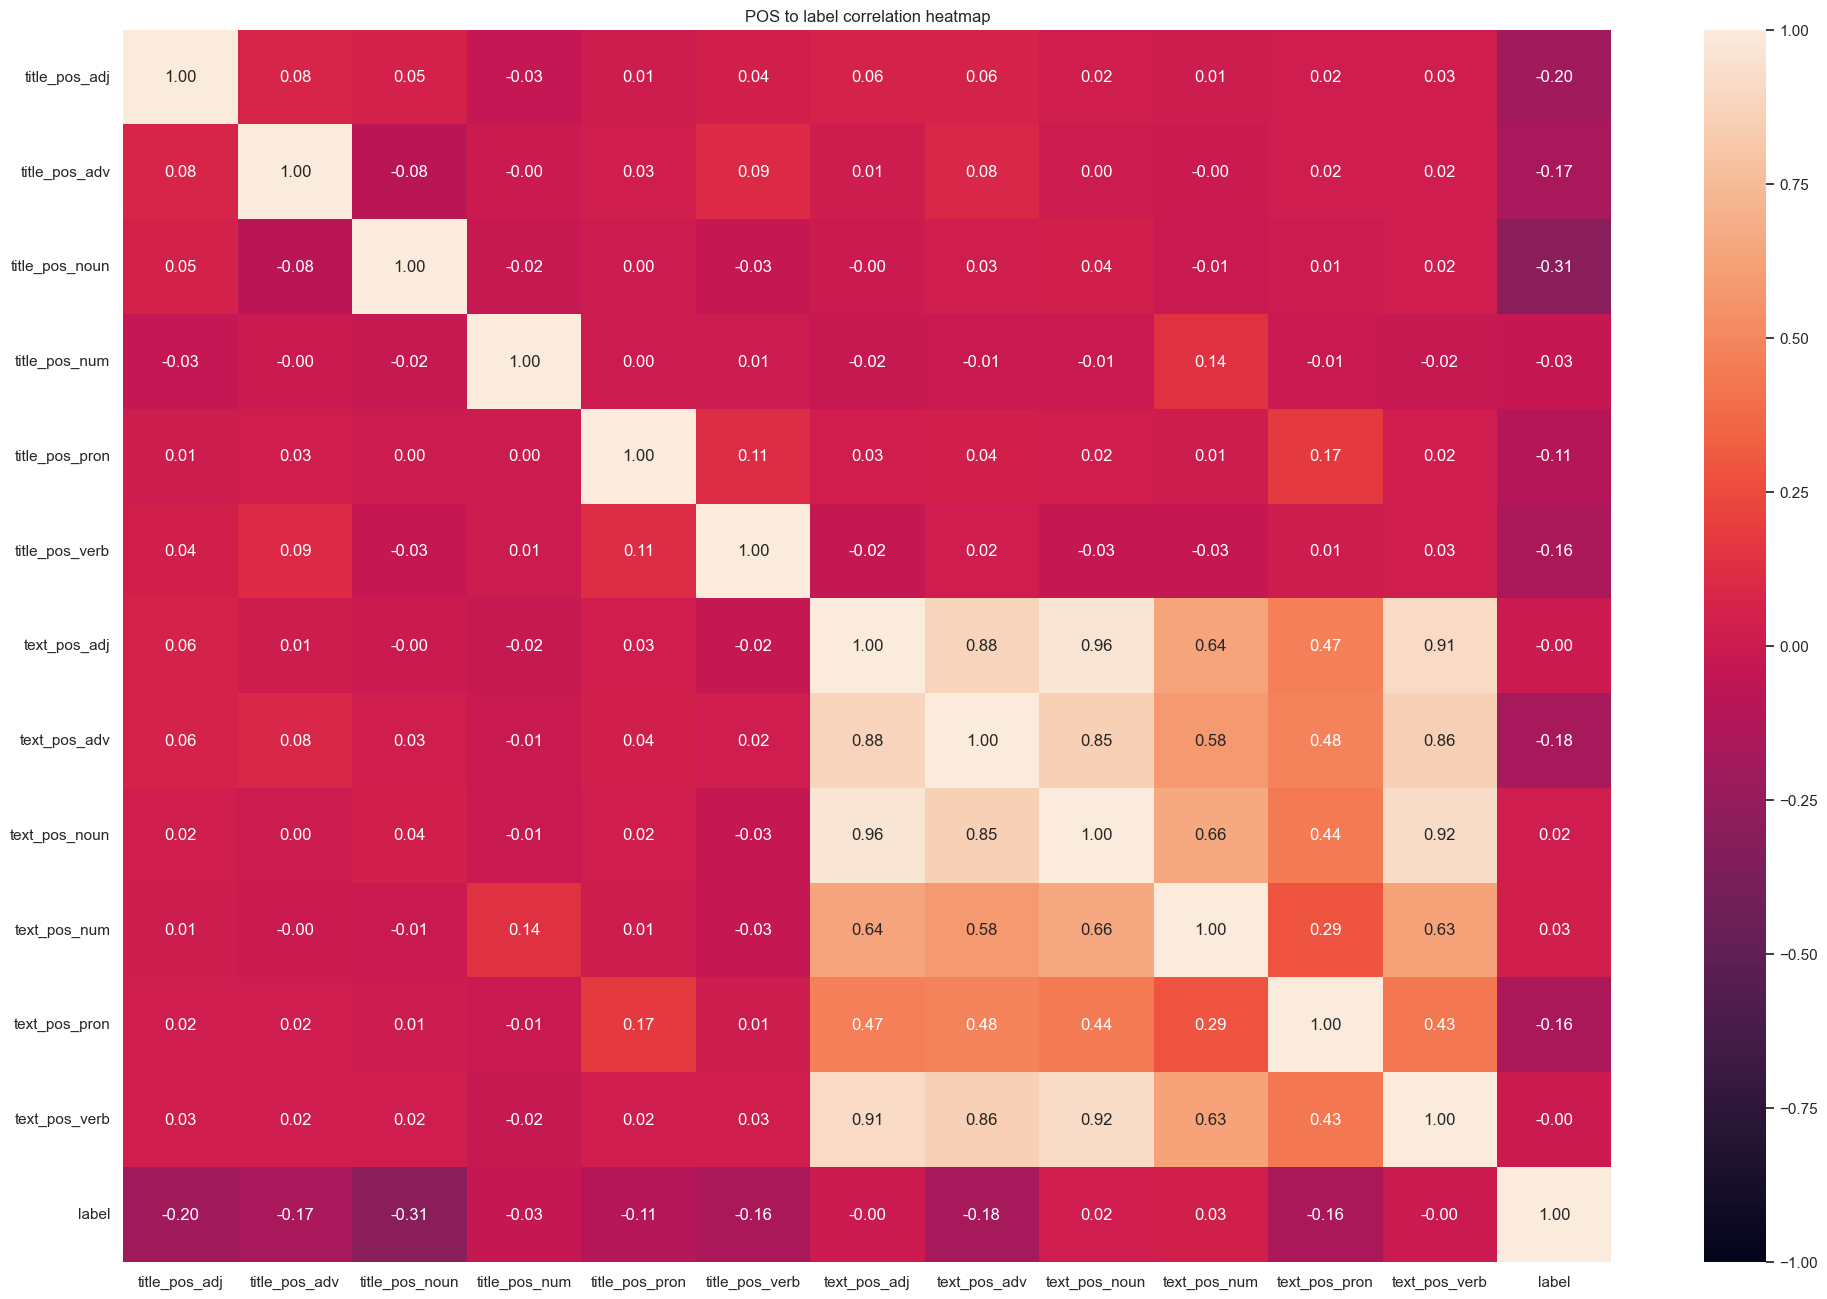

In [113]:
# Isolating required variables
title_pos_corr_df = pd.concat([news["title_pos_adj"], 
                               news["title_pos_adv"], 
                               news["title_pos_noun"], 
                               news["title_pos_num"], 
                               news["title_pos_pron"],
                               news["title_pos_verb"],
                               news["text_pos_adj"], 
                               news["text_pos_adv"], 
                               news["text_pos_noun"], 
                               news["text_pos_num"], 
                               news["text_pos_pron"], 
                               news["text_pos_verb"], 
                               news["label"]], axis = 1)

# Plot correlation heatmap
f = plt.figure(figsize=(24, 16))
sb.heatmap(title_pos_corr_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f").set(title="POS to label correlation heatmap")

### 3. Wordcount and Charcount correlations 

[Text(0.5, 1.0, 'Wordcount & Charcount to label correlation heatmap')]

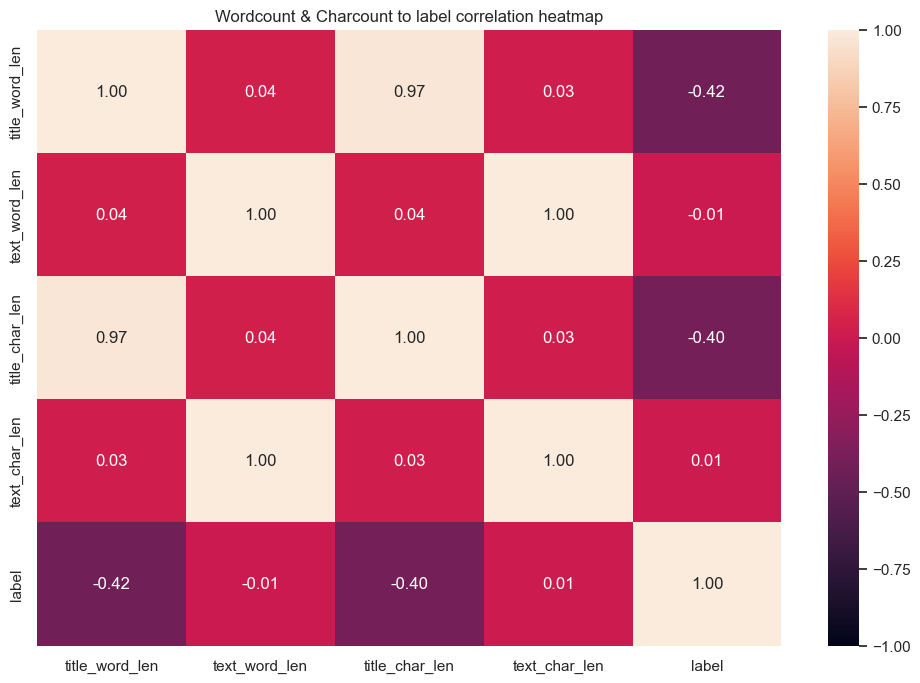

In [114]:
# Isolating required variables
pos_corr_df = pd.concat([news["title_word_len"], 
                         news["text_word_len"],
                         news["title_char_len"],
                         news["text_char_len"],
                         news["label"]], axis = 1)

# Plot correlation heatmap
f = plt.figure(figsize=(12, 8))
sb.heatmap(pos_corr_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f").set(title="Wordcount & Charcount to label correlation heatmap")

### 4. Sentiment Polarity Correlations 

[Text(0.5, 1.0, 'Polarity correlation heatmap')]

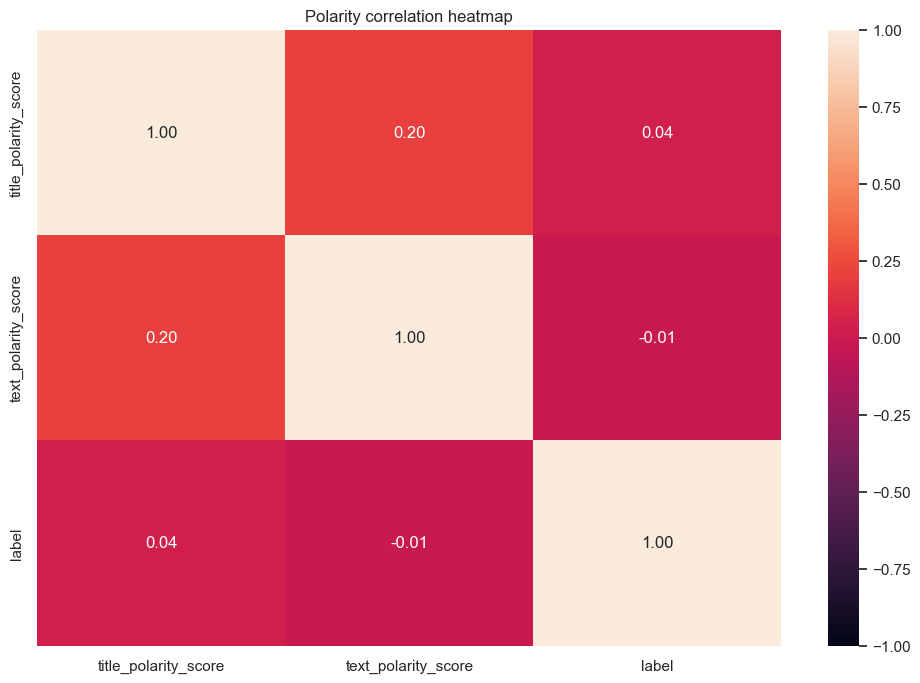

In [115]:
# Isolating required variables
pos_corr_df = pd.concat([news["title_polarity_score"], 
                         news["text_polarity_score"],
                         news["label"]], axis = 1)

# Plot correlation heatmap
f = plt.figure(figsize=(12, 8))
sb.heatmap(pos_corr_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f").set(title="Polarity correlation heatmap")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9f23536d-6e62-418a-b94b-ca9356b2599b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>